<a href="https://colab.research.google.com/github/didellygamb/analysis_with_R/blob/main/Projeto_Estatistica_Fase02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

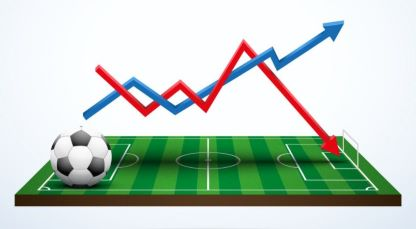

## Projeto Estatística Aplicada - Fase 02

Importe de Bibliotecas usadas nesse Projeto

In [ ]:
ini <- Sys.time()
install.packages(c('skimr','tidyverse'), dep = TRUE)
Sys.time()-ini
library(skimr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Time difference of 11.03494 secs

**Leitura dos dados do arquivo Fifa World**

In [ ]:
# Checando se o diretório está funcionando
print(getwd())  # Print com a confirmação

# # Lendo e armazenando o arquivo para a variável
dados <- "Anexo_Projeto_fifa_world_national_teams_versão_oficial 20241.csv"

# Check if the file exists
if (!file.exists(dados)) {
  stop(paste("File not found:", dados))
}

# Definição da presença do cabeçalho
header_presente <- TRUE

# Lendo as primeiras linhas do arquivo
linhas_iniciais <- readLines(dados, n = 2)
print(linhas_iniciais)

# Garantindo a leitura do arquivo com ou sem cabeçalho
if (header_presente) {
  dados_ <- read.csv2(dados, header = TRUE)
} else {
  dados_ <- read.csv2(dados, header = FALSE)

  # Etapa de validação do cabeçalho: definindo os nomes das colunas manualmente
  cn <- c("id", "name", "full_name", "overall_rating", "value_euro", "wage_euro",
          "nationality", "national_team", "club_team", "age", "height_cm",
          "weight_kgs", "international")

  if (length(cn) == ncol(dados_)) {
    colnames(dados_) <- cn
  } else {
    stop("O número de nomes de colunas não corresponde ao número de colunas no dataframe.")
  }
}

# Verificando a estrutura dos dados
str(dados_)


[1] "/content"
[1] "id;name;full_name;overall_rating;value_euro;wage_euro;nationality;national_team;club_team;age;height_cm;weight_kgs;international_reputation(1-5);weak_foot(1-5);skill_moves(1-5);club_rating;Goleiro;Zagueiro;Meio;Atacante;crossing;finishing;heading_accuracy;short_passing;dribbling;jumping;strength;long_shots;aggression;GK_reflexes"
[2] "158023;Messi;Lionel Andr\xe9s Messi Cuccittini;94;110500000;565000;Argentina;Argentina;FC Barcelona;31;170;72;5;4;4;86;0;0;0;1;86;95;70;92;97;68;66;94;48;8"                                                                                                                                                                               
'data.frame':	718 obs. of  30 variables:
 $ id                           : int  158023 153079 211110 201399 226226 199667 212616 216816 183892 231478 ...
 $ name                         : chr  "Messi" "Aguero" "Dybala" "Icardi" ...
 $ full_name                    : chr  "Lionel Andr\xe9s Messi Cuccittini" "Ser

# Probabilidades Incondicionais

A variável incondicional de interesse para analisar a probabilidade será a 'nationality'. Verificando a frequência da variável no conjunto de dados:


In [ ]:
(tab <- table(dados_$nationality))


          Argentina           Australia             Austria             Belgium 
                 17                  13                  16                  19 
             Brazil            Bulgaria            Cameroon              Canada 
                 23                   3                  17                  19 
              Chile            Colombia      Czech Republic             Denmark 
                 10                  12                  20                  23 
            Ecuador               Egypt             England             Finland 
                  6                   7                  23                  19 
             France             Germany              Greece             Hungary 
                 23                  23                  21                   8 
            Iceland               Italy         Ivory Coast              Mexico 
                 13                  22                  14                  10 
        Netherlands        

A probabilidade incondicional de um jogador, nessa base de dados, ser do país Brazil é de $P(\text{Brazil})=\frac{23}{718} \approx 0.032$

In [ ]:
(n <- sum(tab))
# Decimal
round(pBrazil <- tab[5]/n, 4)

# Fração
MASS::fractions(pBrazil)


[1] 718

Brazil 
 0.032

Brazil 
23/718

# Probabilidades Condicionais

Para análise de variáveis condicionais, iremos analisar a variável 'international_reputation' cruzada com a 'value_euro'

In [ ]:
tab2 <- table(dados_$international_reputation, dados_$value_euro)
(tab2 <- addmargins(tab2))

,230000,240000,300000,325000,375000,400000,425000,475000,500000,525000,⋯,78500000,80000000,81000000,89000000,93000000,96500000,102000000,108000000,110500000,Sum
1,1,1,2,1,1,3,1,1,3,1,⋯,0,0,0,0,0,0,0,0,0,402
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,183
3,0,0,0,0,0,0,0,0,0,0,⋯,1,0,1,1,0,1,0,0,0,104
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,1,0,0,24
5,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,1,5
Sum,1,1,2,1,1,3,1,1,3,1,⋯,1,1,1,1,1,1,1,1,1,718


Analisando a pontuação internacional versus o valor em euro que um jogador possui, podemos verificar que os jogadores com pontuação 1 (são mais frequentes na base de dados) possuem um valor em euro inferior do que os jogadores com a pontuação 5, com valores mais elevados.

#  Intervalos de confiança

Iremos analisar o intervalo de confiança para a variável de peso 'weight_kgs' e 'age'                          

In [ ]:
# Calculando o IC95% via função t.test
result <- t.test(dados_$weight_kgs)

# Extraindo o IC95%
(ic <- result$conf.int)

[1] 77.13932 78.20887
attr(,"conf.level")
[1] 0.95

Com esse intervalo podemos dizer, com alta porcentagem de confiança, que a média do peso dos jogadores no seu conjunto de dados está entre 77.14 kg e 78.21 kg. Isso nos dá uma ideia sobre a centralidade e a variabilidade dos pesos dos jogadores.

In [ ]:
result <- t.test(dados_$age)

(ic <- result$conf.int)

[1] 26.30249 26.82843
attr(,"conf.level")
[1] 0.95

Podemos dizer o mesmo sobre a variável de idade, onde a média entre as idades se encontra em 26 anos. Com esse intervalo restrito, sugere uma baixa variação nas idades dos indivíduos dentro da amostra, o que faz sentido quando olhamos a idade ativa de um jogador.

# Testes de hipóteses

Analisando a variável 'weight_kgs', verificamos que com base no valor-p de 0.2319 e no intervalo de confiança, não podemos rejeitar a hipótese nula. Isso significa que não temos evidência estatística suficiente para afirmar que a média verdadeira da base dos jogadores é diferente de 78 kg. A média arredondada amostral pode ser considerada como a média da população por inteiro pela variação mínima decimal.

In [ ]:
# Dados estatísticos da variável de weight
summary(dados_$weight_kgs)
# Média arredondada para o inteiro
(ma <- round(mean(dados_$weight_kgs),0))
# Via função t.test
t.test(dados_$weight_kgs, mu = ma)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  59.00   73.00   77.00   77.67   82.00  100.00 

[1] 78


	One Sample t-test

data:  dados_$weight_kgs
t = -1.1965, df = 717, p-value = 0.2319
alternative hypothesis: true mean is not equal to 78
95 percent confidence interval:
 77.13932 78.20887
sample estimates:
mean of x 
 77.67409 


In [ ]:
# # Dados estatísticos da variável height
summary(dados_$height_cm)
# Média arredondada para o inteiro
(ma <- round(mean(dados_$height_cm),0))
# Via função t.test
t.test(dados_$height_cm, mu = ma)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152     170     183     177     188     203 

[1] 177


	One Sample t-test

data:  dados_$height_cm
t = 0.044315, df = 717, p-value = 0.9647
alternative hypothesis: true mean is not equal to 177
95 percent confidence interval:
 175.9747 178.0726
sample estimates:
mean of x 
 177.0237 


O mesmo ocorreu ao analisar a variável 'height_cm', tendo a média arredondada para 177 e o valor p em 0.9647 podemos confirmar como verdadeira a hipótese nula por ser um valor muito acima de 0.05. A média arredondada amostral pode ser considerada exatamente a média da população por inteiro.  

# Análise de Regressão Simples

Para análise de regressão simples iremos analisar as variáveis "overall_rating" e "value_euro", entendendo que o valor de mercado de um jogador pode estar fortemente correlacionado com sua avaliação geral.


Call:
lm(formula = overall_rating ~ value_euro, data = dados_)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4164  -1.5912   0.5802   2.1363   8.4780 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.235e+01  1.615e-01   448.0   <2e-16 ***
value_euro  2.959e-07  7.379e-09    40.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.343 on 716 degrees of freedom
Multiple R-squared:  0.692,	Adjusted R-squared:  0.6915 
F-statistic:  1608 on 1 and 716 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.9454, p-value = 1.31e-15


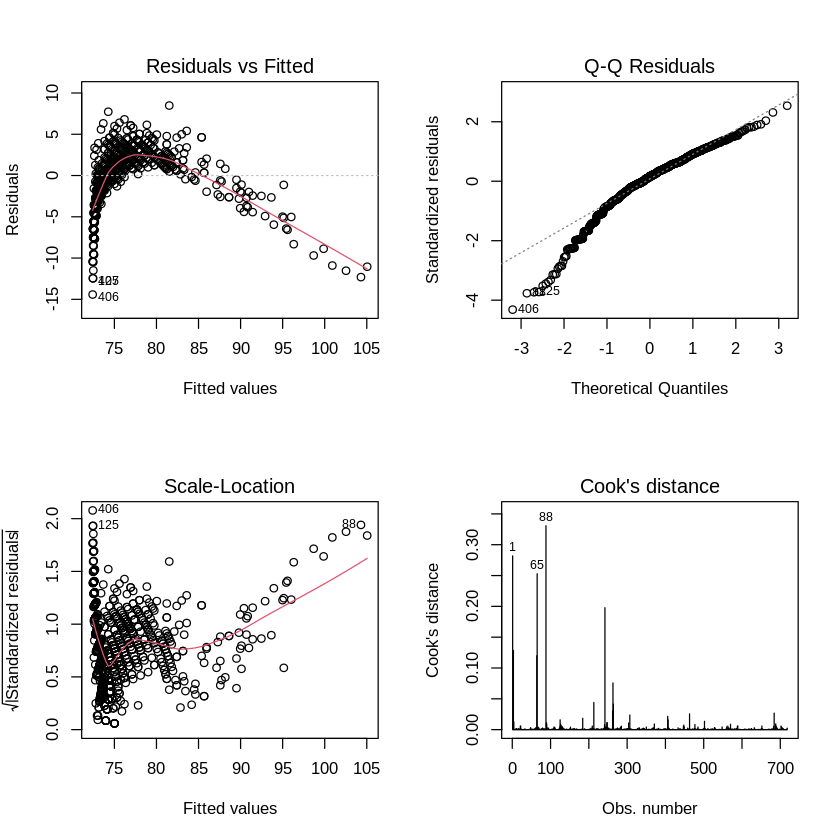

In [ ]:
fit <- lm(overall_rating ~ value_euro, data = dados_)

# Diagnóstico do Modelo
summary(fit)
shapiro.test(fit$residuals)
par(mfrow = c(2, 2))
plot(fit, which = 1:4)

A análise de regressão simples indica uma relação significativa entre o valor de mercado do jogador (value_euro) e sua avaliação geral (overall_rating). Com um R² de 0.692, aproximadamente 69.2% da variação na avaliação geral é explicada pelo valor de mercado. O coeficiente de 2.959e-07 sugere que, para cada aumento de 1 euro no valor do jogador, a avaliação geral aumenta em 2.959e-07 pontos. O deslocamento no gráfico de QQ sugere uniformidade na distribuição residual das variáveis.
Podemos concluir que as variáveis estão moderadamente correlacionadas, um jogador com maior overall_rating pode ter um value_euro mais elevado, porém uma correlação moderada não significa causalidade. Para melhor resultado da análise dos modelos, pode ser feita uma busca de outliers e um tratamento na base de dados.

# Manchetes

1- "*Estrelas do Futebol: Quanto mais caros, melhor? Análise revela que jogadores com valor de mercado elevado tendem a brilhar mais!*"

**Detalhes** Análise da correlação calculada revela que jogadores com valores de mercado mais altos tendem a ter avaliações gerais superiores, indicando um retorno positivo no investimento do time.

2- "*Pesos em Jogo: Estudo mostra que a média de 77.67 kg dos jogadores se distingue na confiança estatística!*"

**Detalhes** Acompanhe na página 20 a análise estatística que revelou que a média de 77.67 kg dos jogadores, com um intervalo de confiança de 95% entre 77.13932 kg e 78.20887 kg, não difere significativamente da média de referência de 78 kg, conforme confirmado pelo teste t com um valor-p de 0.2319.

3- *Seleção Natural: Análise vevela que 3.2% dos jogadores no projeto Fifa World são brasileiros, acentuando sua presença no cenário Internacional!"*

**Detalhes** Uma análise estatística mostrou que aproximadamente 3.2% dos jogadores no conjunto de dados disponibilizados pela Fifa são brasileiros, representando um total de 23 jogadores em uma amostra de 718. Essa proporção destaca a significativa presença de talentos brasileiros no panorama global do futebol